<a href="https://colab.research.google.com/github/PoonamSarawgi/Deep-Leaning/blob/main/house_loan_data_analysis_dl_cep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Loan Data Analysis
Course-end Project 1

DESCRIPTION

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Objective: Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

Steps to be done:

⦁    Load the dataset that is given to you
⦁    Check for null values in the dataset
⦁    Print percentage of default to payer of the dataset for the TARGET column
⦁    Balance the dataset if the data is imbalanced
⦁    Plot the balanced data or imbalanced data
⦁    Encode the columns that is required for the model
⦁    Calculate Sensitivity as a metrice
⦁    Calculate area under receiver operating characteristics curve

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cufflinks as cf
from plotly.offline import iplot
import tensorflow as tf
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install imbalanced-learn

## **Step 1: Load the dataset that is given**

In [ ]:
df=pd.read_csv('loan_data.csv')

In [ ]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(307511, 122)

# Step 2: Check for null values in the dataset

In [ ]:
# null values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [ ]:
df.info(122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Step 3: Print percentage of default to payer of the dataset for the TARGET column

In [ ]:
df['TARGET'].unique()

array([1, 0])

In [ ]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

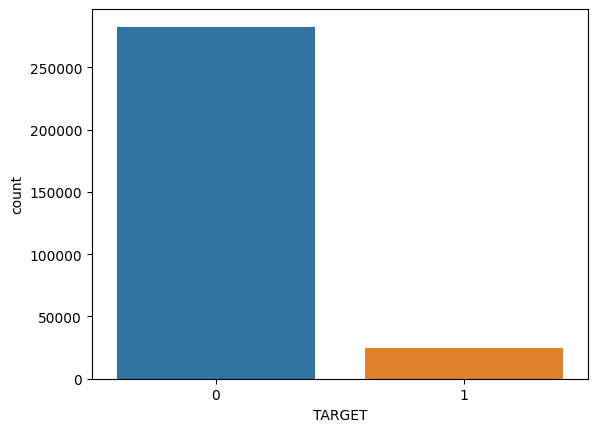

In [ ]:
sns.countplot(x=df['TARGET'])
plt.show()

In [ ]:
#Calculate the percentage of defaults to payer
num_payers = df[df['TARGET'] == 0]
num_defaults = df[df['TARGET'] == 1]

In [ ]:
num_payers.shape

(282686, 122)

In [ ]:
num_defaults.shape

(24825, 122)

In [ ]:
total_entries = df.shape[0]

In [ ]:
num_payers = df[df['TARGET'] == 0].shape[0]
num_defaults = df[df['TARGET'] == 1].shape[0]

In [ ]:
percentage_defaults = (num_defaults / total_entries) * 100
percentage_payers = (num_payers / total_entries) * 100

print(f"Percentage of defaults: {percentage_defaults:.2f}%")
print(f"Percentage of payers: {percentage_payers:.2f}%")

Percentage of defaults: 8.07%
Percentage of payers: 91.93%


<Axes: ylabel='TARGET'>

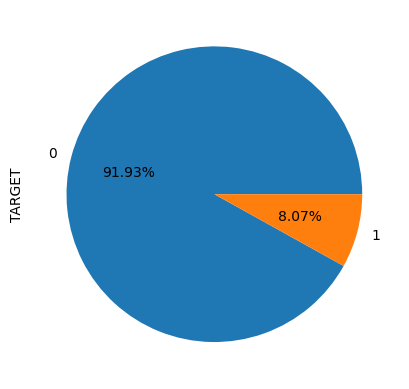

In [ ]:
df.TARGET.value_counts().plot(kind='pie',autopct='%1.2f%%')

In [ ]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
# null values
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# Step 4: Balance the dataset if the data is imbalanced

In [ ]:
df_info = pd.DataFrame(columns=['Name of Col', 'Num of Null', 'Dtype', 'N_Unique'])

for i in range(0, len(df.columns)):
    df_info.loc[i] = [df.columns[i],
                        df[df.columns[i]].isnull().sum(),
                        df[df.columns[i]].dtypes,
                        df[df.columns[i]].nunique()]

In [ ]:
df_info

,Name of Col,Num of Null,Dtype,N_Unique
0,SK_ID_CURR,0,int64,307511
1,TARGET,0,int64,2
2,NAME_CONTRACT_TYPE,0,object,2
3,CODE_GENDER,0,object,3
4,FLAG_OWN_CAR,0,object,2
...,...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,float64,9
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,float64,9
119,AMT_REQ_CREDIT_BUREAU_MON,41519,float64,24
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,float64,11


In [ ]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Step 5: Plot the balanced data or imbalanced data

<Axes: ylabel='TARGET'>

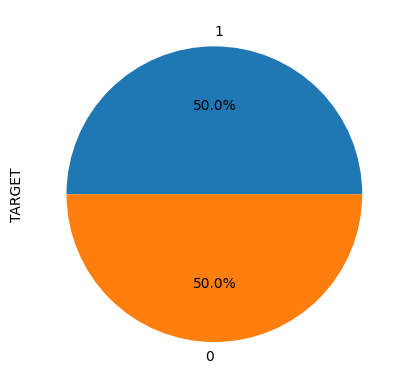

In [ ]:
shuffled_data=df.sample(frac=1,random_state=3)
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1]
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825,random_state=69)
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan])
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

In [ ]:
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [ ]:
normalised_home_loan.head

<bound method NDFrame.head of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
207339      340318       1         Cash loans           F            N   
8756        110186       1         Cash loans           M            Y   
230344      366811       1         Cash loans           F            N   
178329      306645       1         Cash loans           M            Y   
55586       164407       1         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
130947      251878       0         Cash loans           F            Y   
40467       146875       0         Cash loans           F            N   
187004      316791       0         Cash loans           M            N   
131755      252811       0         Cash loans           F            N   
121862      241287       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
207339     

In [ ]:
normalised_home_loan.dropna(axis=0)
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [ ]:
normalised_home_loan.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64

In [ ]:
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR))

[ 0. nan  1.  2.  4.  3.  9.]
[ 0. nan  1.  2.  4.  3.  5.  6.]
[ 0. nan  1.  3.  5.  9.  2.  6.  8.  4. 11. 12.  7. 13. 10. 17. 15. 14.
 16. 18. 27.]
[ 0. nan  2.  3.  1.  4.  5.  6. 19.  7.]
[ 3.  0. nan  1.  5.  4.  2.  6.  7.  8.  9. 10. 14. 13. 12. 11. 22. 16.
 23. 17.]


In [ ]:
normalised_home_loan.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
279124,423360,1,Cash loans,M,Y,N,1,157500.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
216116,350411,1,Cash loans,M,Y,N,0,112500.0,225000.0,25447.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
133687,255050,1,Cash loans,M,Y,N,1,337500.0,704844.0,26977.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4159,104863,1,Cash loans,M,Y,N,0,265500.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208602,341779,1,Cash loans,F,Y,Y,1,247500.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108677,226053,0,Cash loans,M,Y,Y,0,135000.0,679500.0,36333.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
258603,399273,0,Revolving loans,M,Y,Y,1,450000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
51880,160079,0,Cash loans,M,Y,Y,0,202500.0,750649.5,53514.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
282820,427561,0,Cash loans,F,Y,N,0,270000.0,1800000.0,62568.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
print(normalised_home_loan.info())
print(normalised_home_loan.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB
None
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64


# Step 6: Plot the balanced data or imbalanced data

<Axes: ylabel='CODE_GENDER'>

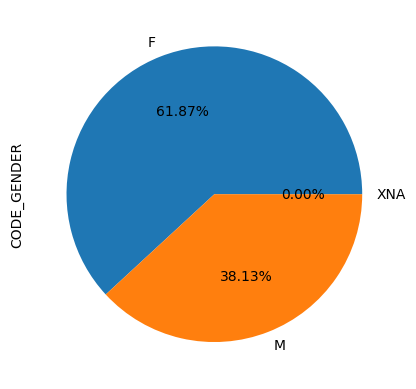

In [ ]:
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.2f%%")

<Axes: ylabel='CNT_CHILDREN'>

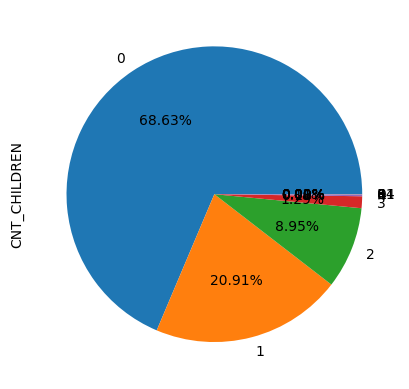

In [ ]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.2f%%")

In [ ]:
!pip install chart_studio

Checking people having income >1000000 and having loan

In [ ]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] > 1000000])*100

0    64.864865
1    35.135135
Name: TARGET, dtype: float64

Checking people having childrens 2 or more and having loan

In [ ]:
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100)

1    57.047872
0    42.952128
Name: TARGET, dtype: float64
1    81.818182
0    18.181818
Name: TARGET, dtype: float64


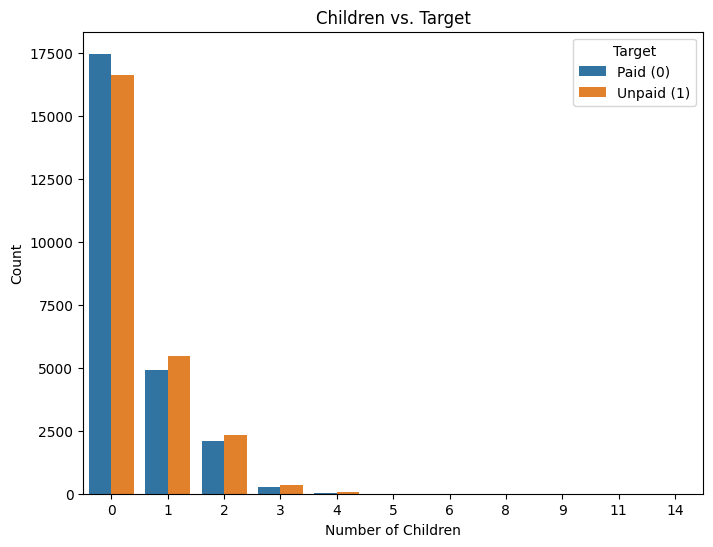

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=normalised_home_loan)
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Children vs. Target')
plt.legend(title='Target', labels=['Paid (0)', 'Unpaid (1)'])
plt.show()

Checking people having their own car or not and having loan

In [ ]:
print('% of People having no car but having loans:\n',(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print('% of People having car also having loans:\n',(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100)

% of People having no car but having loans:
 1    51.350064
0    48.649936
Name: TARGET, dtype: float64
% of People having car also having loans:
 0    52.823962
1    47.176038
Name: TARGET, dtype: float64


Checking genders of peoples and having loan

In [ ]:
print('% of Males:\n',(normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100)
print('% of Females:\n',(normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100)

% of Males:
 1    56.280372
0    43.719628
Name: TARGET, dtype: float64
% of Females:
 0    53.867691
1    46.132309
Name: TARGET, dtype: float64


Checking Type of loan

In [ ]:
print('Cash loans:\n',(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans'])*100)
print('Revolving loans:\n',(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans'])*100)

Cash loans:
 1    50.802923
0    49.197077
Name: TARGET, dtype: float64
Revolving loans:
 0    59.309995
1    40.690005
Name: TARGET, dtype: float64


#**Applying Feature Engineering**

# Step 7: Encode the columns that is required for the model

In [ ]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=5)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']])
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(10))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
302218         Cash loans                      0.0
167526         Cash loans                      0.0
159305         Cash loans                      0.0
275427         Cash loans                      0.0
8837           Cash loans                      0.0
192094         Cash loans                      0.0
235115    Revolving loans                      1.0
79051          Cash loans                      0.0
123267    Revolving loans                      1.0
5517           Cash loans                      0.0
0.0    45708
1.0     3942
Name: NAME_CONTRACT_TYPE_CODE, dtype: int64


In [ ]:
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']])
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
302218           M               1.0
167526           F               0.0
159305           M               1.0
275427           F               0.0
8837             M               1.0
192094           M               1.0
235115           F               0.0
79051            F               0.0
123267           M               1.0
5517             F               0.0
128624           M               1.0
187583           F               0.0
143193           M               1.0
288269           F               0.0
44320            F               0.0
256898           F               0.0
118237           F               0.0
5980             M               1.0
96475            F               0.0
249976           F               0.0
0.0    30716
1.0    18932
2.0        2
Name: CODE_GENDER_CODE, dtype: int64


In [ ]:
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']])
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
302218            N                0.0
167526            N                0.0
159305            N                0.0
275427            N                0.0
8837              N                0.0
192094            N                0.0
235115            N                0.0
79051             N                0.0
123267            N                0.0
5517              N                0.0
128624            N                0.0
187583            N                0.0
143193            N                0.0
288269            Y                1.0
44320             Y                1.0
256898            N                0.0
118237            N                0.0
5980              Y                1.0
96475             N                0.0
249976            N                0.0
0.0    33591
1.0    16059
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [ ]:
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']])
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
302218                0.0             0
167526                0.0             0
159305                2.0             2
275427                0.0             0
8837                  0.0             0
192094                0.0             0
235115                0.0             0
79051                 0.0             0
123267                1.0             1
5517                  0.0             0
128624                0.0             0
187583                1.0             1
143193                0.0             0
288269                0.0             0
44320                 0.0             0
256898                0.0             0
118237                2.0             2
5980                  0.0             0
96475                 0.0             0
249976                0.0             0
0.0     34073
1.0     10381
2.0      4444
3.0       642
4.0        89
5.0        10
6.0         6
8.0         2
9.0         1
10.0        1
7.0         1
Name: 

In [ ]:
normalised_home_loan=normalised_home_loan.sample(frac=1,random_state=45)

In [ ]:
normalised_home_loan['TARGET'].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [ ]:
y=normalised_home_loan.TARGET

In [ ]:
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']

In [ ]:
X=normalised_home_loan[normalised_home_loan_features]

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [ ]:
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.33,random_state=45)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 2) (16385, 2) (33265,) (16385,)


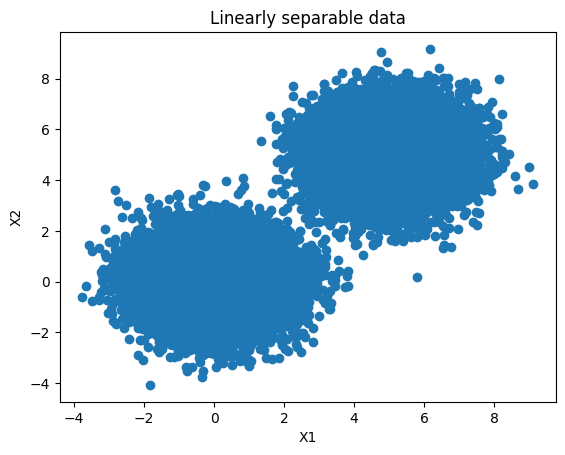

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1])
plt.title('Linearly separable data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Step 8: Calculate Sensitivity as a metrice

In [ ]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [ ]:
clf=svm.SVC(kernel='linear')

In [ ]:
clf=clf.fit(X_train,y_train)

In [ ]:
!pip install --upgrade scikit-learn

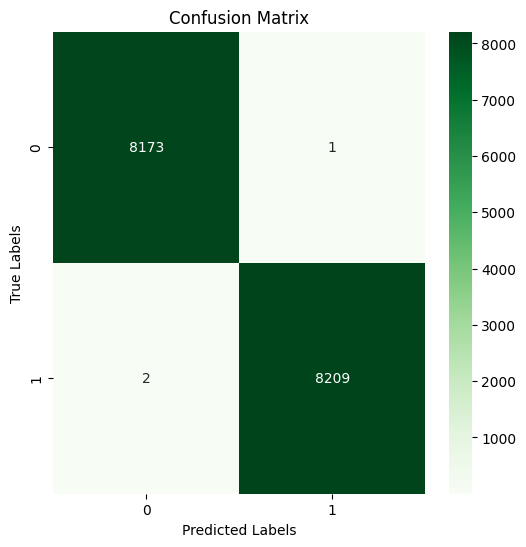

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **Build the ANN architechture**

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Assuming you have data X_train and X_test with 2 features (change this if you have different data)
num_features_for_samples = 2

# Verify and reshape the data
if X_train.shape[1] != num_features_for_samples or X_test.shape[1] != num_features_for_samples:
    raise ValueError(f"Data has the wrong number of features. Expected {num_features_for_samples} features per sample.")

# Build the model with correct input shape
model = Sequential()
model.add(Dense(19, activation='relu', input_shape=(num_features_for_samples,)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 19)                57        
                                                                 
 dropout (Dropout)           (None, 19)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                200       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 268
Trainable params: 268
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Earlystopping
early_stop = EarlyStopping(monitor='val_loss',
                           min_delta = 0.01,
                           mode = 'min',
                           verbose=1,
                           patience=10)

In [ ]:
history_with_early_stop=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test),
                 callbacks=[early_stop])

Epoch 1/50
130/130 [==============================] - 2s 5ms/step - loss: 0.6684 - accuracy: 0.6437 - val_loss: 0.2897 - val_accuracy: 0.9370
Epoch 2/50
130/130 [==============================] - 1s 6ms/step - loss: 0.2215 - accuracy: 0.9303 - val_loss: 0.0645 - val_accuracy: 0.9860
Epoch 3/50
130/130 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9665 - val_loss: 0.0266 - val_accuracy: 0.9934
Epoch 4/50
130/130 [==============================] - 1s 4ms/step - loss: 0.0627 - accuracy: 0.9777 - val_loss: 0.0144 - val_accuracy: 0.9961
Epoch 5/50
130/130 [==============================] - 1s 4ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0090 - val_accuracy: 0.9974
Epoch 6/50
130/130 [==============================] - 1s 6ms/step - loss: 0.0369 - accuracy: 0.9892 - val_loss: 0.0062 - val_accuracy: 0.9984
Epoch 7/50
130/130 [==============================] - 1s 5ms/step - loss: 0.0310 - accuracy: 0.9916 - val_loss: 0.0056 - val_accuracy: 0.9982
Epoch 

In [ ]:
history_no_early_stop=model.fit(X_train,y_train,
                 epochs=50,
                 batch_size=256,
                 validation_data=(X_test,y_test))

Epoch 1/50
130/130 [==============================] - 2s 15ms/step - loss: 0.0086 - accuracy: 0.9982 - val_loss: 6.9440e-04 - val_accuracy: 0.9998
Epoch 2/50
130/130 [==============================] - 1s 6ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss: 7.9861e-04 - val_accuracy: 0.9995
Epoch 3/50
130/130 [==============================] - 1s 7ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 6.2330e-04 - val_accuracy: 0.9999
Epoch 4/50
130/130 [==============================] - 1s 7ms/step - loss: 0.0069 - accuracy: 0.9985 - val_loss: 6.0474e-04 - val_accuracy: 0.9998
Epoch 5/50
130/130 [==============================] - 1s 4ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 6.1350e-04 - val_accuracy: 0.9998
Epoch 6/50
130/130 [==============================] - 1s 4ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 5.7806e-04 - val_accuracy: 0.9998
Epoch 7/50
130/130 [==============================] - 1s 4ms/step - loss: 0.0060 - accuracy: 0.9987 - val_loss: 6.1969e-04 

Step 9: Calculate area under receiver operating characteristics curve

In [ ]:
# Evaluate the train model
model.evaluate(X_train,y_train)

1040/1040 [==============================] - 2s 2ms/step - loss: 8.6404e-04 - accuracy: 0.9998


[0.0008640385349281132, 0.9997594952583313]

In [ ]:
# Evaluate the test model
model.evaluate(X_test,y_test)

513/513 [==============================] - 1s 2ms/step - loss: 7.0306e-04 - accuracy: 0.9998


[0.0007030581473372877, 0.99981689453125]

In [ ]:
# Evaluate the model without early stopping
loss_no_early_stop, accuracy_no_early_stop = model.evaluate(X_test, y_test)

# Evaluate the model with early stopping
loss_with_early_stop, accuracy_with_early_stop = model.evaluate(X_test, y_test)

print("Accuracy without early stopping:", accuracy_no_early_stop)
print("Loss without early stopping:", loss_no_early_stop)
print("Accuracy with early stopping:", accuracy_with_early_stop)
print("Loss with early stopping:", loss_with_early_stop)

513/513 [==============================] - 1s 2ms/step - loss: 7.0306e-04 - accuracy: 0.9998
Accuracy without early stopping: 0.99981689453125
Loss without early stopping: 0.0007030581473372877
Accuracy with early stopping: 0.99981689453125
Loss with early stopping: 0.0007030581473372877


In [ ]:
# Evaluate the model without early stopping
loss_no_early_stop, accuracy_no_early_stop = model.evaluate(X_train, y_train)

# Evaluate the model with early stopping
loss_with_early_stop, accuracy_with_early_stop = model.evaluate(X_train, y_train)

print("Accuracy without early stopping:", accuracy_no_early_stop)
print("Loss without early stopping:", loss_no_early_stop)
print("Accuracy with early stopping:", accuracy_with_early_stop)
print("Loss with early stopping:", loss_with_early_stop)

1040/1040 [==============================] - 2s 2ms/step - loss: 8.6404e-04 - accuracy: 0.9998
Accuracy without early stopping: 0.9997594952583313
Loss without early stopping: 0.0008640385349281132
Accuracy with early stopping: 0.9997594952583313
Loss with early stopping: 0.0008640385349281132


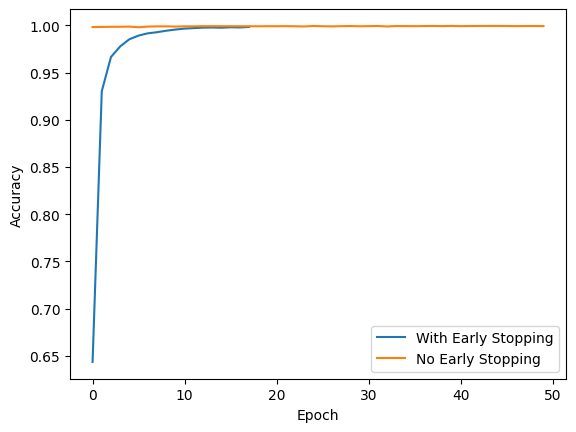

In [ ]:
plt.plot(history_with_early_stop.history['accuracy'], label='With Early Stopping')
plt.plot(history_no_early_stop.history['accuracy'], label='No Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have trained a classifier 'model' and have test data 'X_test' and 'y_test'.

# Make predictions on the test data
y_pred_prob = model.predict(X_test)[:, 0]  # Get the predicted probabilities for class 1

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC Score:", roc_auc)

513/513 [==============================] - 1s 1ms/step
ROC AUC Score: 0.9999996275145413
